In [5]:
import yaml
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
with open('config.yml', 'r') as file:
    config = yaml.safe_load(file)

# MetaData

In [3]:
daily_metadata = pd.read_csv(config['data_path'] + 'daily_metadata.csv')
defog_metadata = pd.read_csv(config['data_path'] + 'defog_metadata.csv')
tdcsfog_metadata = pd.read_csv(config['data_path'] + 'tdcsfog_metadata.csv')

subjects = pd.read_csv(config['data_path'] + 'subjects.csv')
tasks = pd.read_csv(config['data_path'] + 'tasks.csv')

events = pd.read_csv(config['data_path'] + 'events.csv')

sample_submission = pd.read_csv(config['data_path'] + 'sample_submission.csv')

In [4]:
sample_submission

,Id,StartHesitation,Turn,Walking
0,003f117e14_0,0,0,0
1,003f117e14_1,0,0,0
2,003f117e14_2,0,0,0
3,003f117e14_3,0,0,0
4,003f117e14_4,0,0,0
...,...,...,...,...
286365,02ab235146_281683,0,0,0
286366,02ab235146_281684,0,0,0
286367,02ab235146_281685,0,0,0
286368,02ab235146_281686,0,0,0


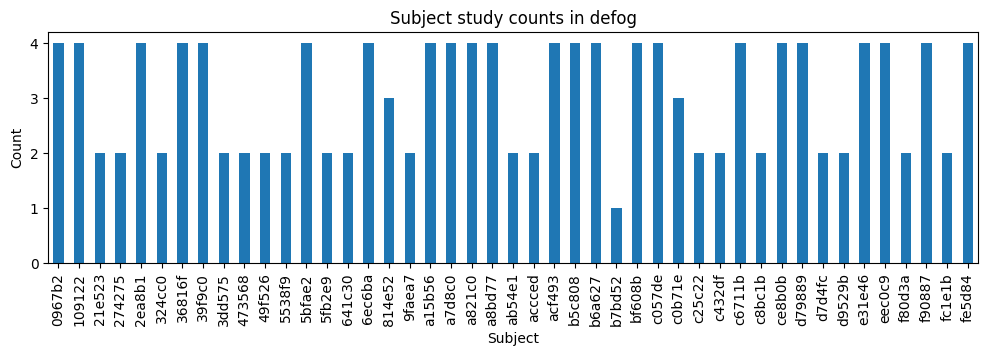

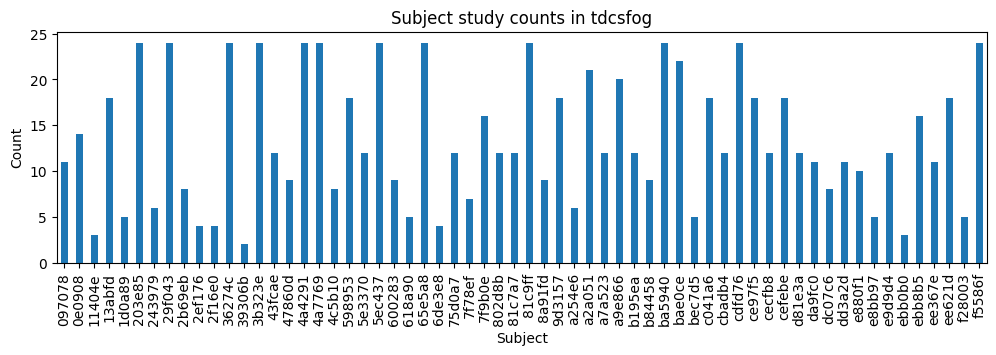

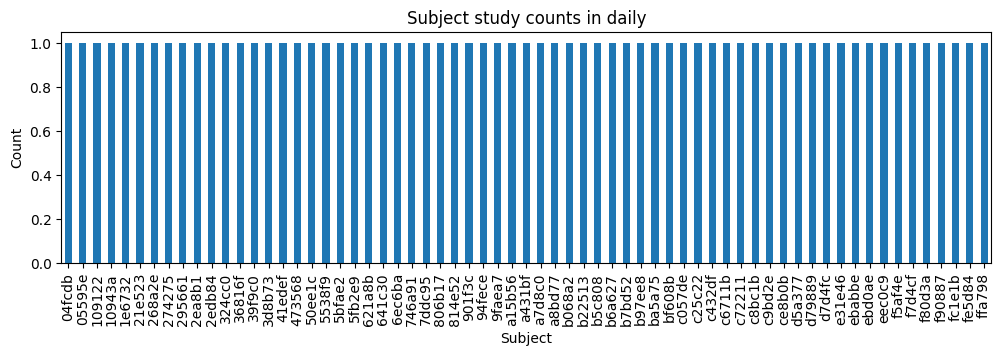

In [83]:
plt.figure(figsize=(12,3))
plt.title(f'Subject study counts in defog')
defog_metadata.groupby('Subject').count().sort_values('Subject').Id.plot.bar()
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12,3))
plt.title(f'Subject study counts in tdcsfog')
tdcsfog_metadata.groupby('Subject').count().sort_values('Subject').Id.plot.bar()
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12,3))
plt.title(f'Subject study counts in daily')
daily_metadata.groupby('Subject').count().sort_values('Subject').Id.plot.bar()
plt.ylabel('Count')
plt.show()

In [18]:
subjects

,Subject,Visit,Age,Sex,YearsSinceDx,UPDRSIII_On,UPDRSIII_Off,NFOGQ
0,04fcdb,1.0,63,M,3.0,30.0,NaN,0
1,05595e,1.0,56,M,8.0,28.0,NaN,0
2,0967b2,1.0,59,M,10.0,38.0,48.0,19
3,0967b2,2.0,59,M,10.0,37.0,44.0,13
4,097078,NaN,70,F,10.0,27.0,50.0,20
...,...,...,...,...,...,...,...,...
168,f90887,1.0,72,M,16.0,35.0,46.0,26
169,fc1e1b,1.0,82,F,11.0,38.0,42.0,21
170,fe5d84,2.0,72,M,14.0,32.0,45.0,17
171,fe5d84,1.0,72,F,14.0,13.0,33.0,15


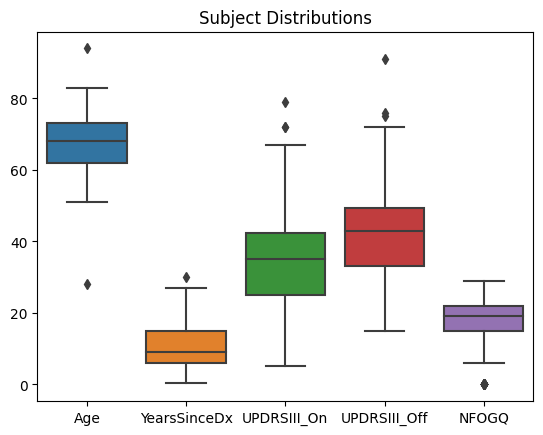

In [19]:
sns.boxplot(subjects[['Age', 'YearsSinceDx', 'UPDRSIII_On', 'UPDRSIII_Off', 'NFOGQ']])
plt.title('Subject Information')
plt.show()

# Velocity Data

In [7]:
from EDA import plot_velocity_data

### Confirming StartHesitation Turn and Walking are mutally exclusive

In [18]:
m = 0
for folder in ['tdcsfog/', 'defog/']:
    print(folder)
    path = config['data_path'] + 'train/' + folder
    files = os.listdir(path)

    for name in files:
        file_path = os.path.join(path, name)
        df = pd.read_csv(file_path)
        m = max(m, df[['StartHesitation', 'Turn', 'Walking']].sum(axis=1).max())
    
    
print(m)

tdcsfog/
defog/
1


### DEFOG

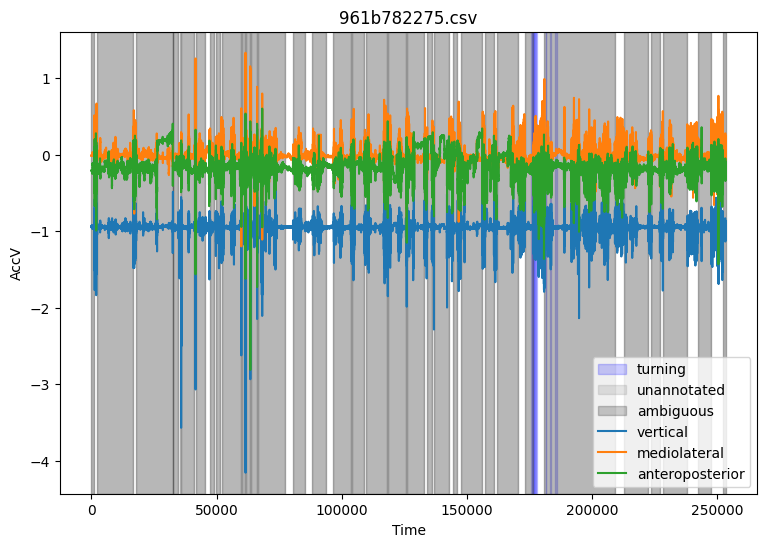

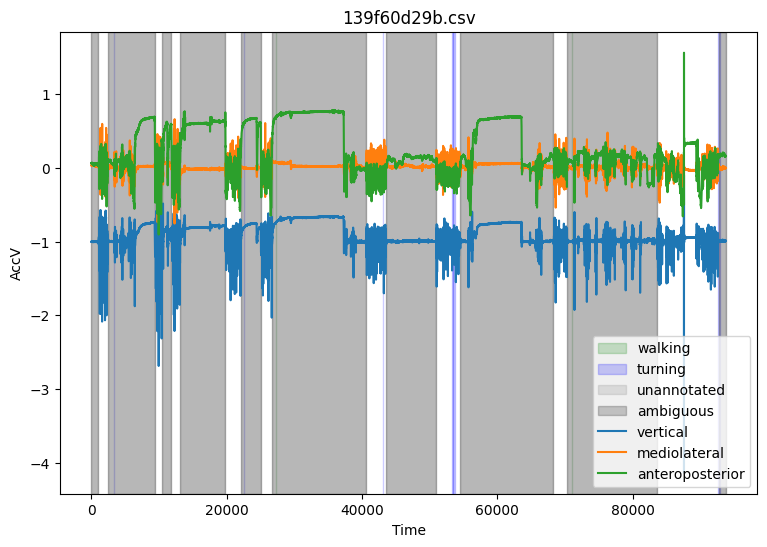

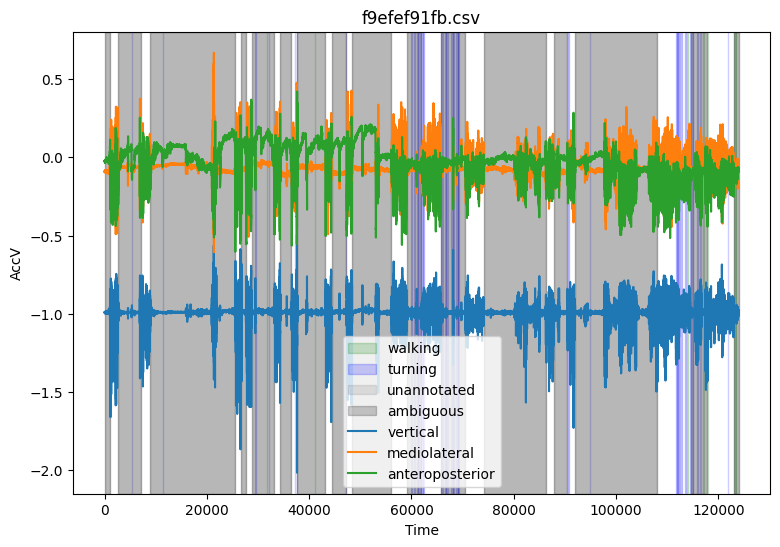

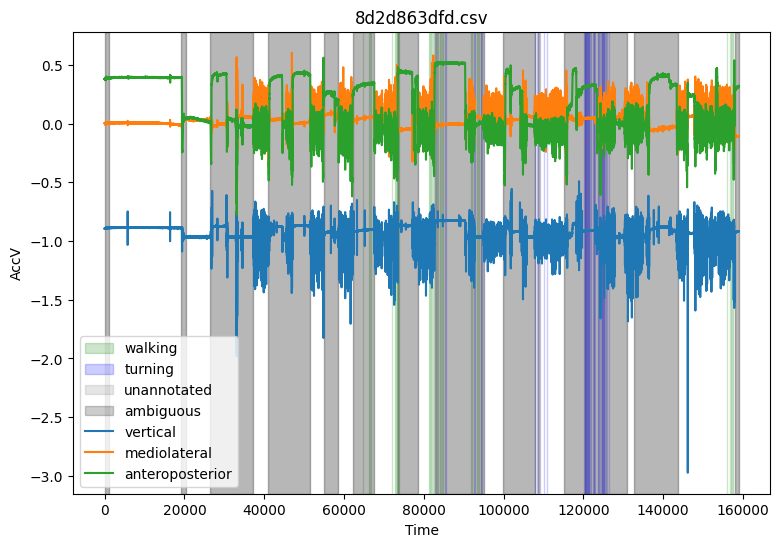

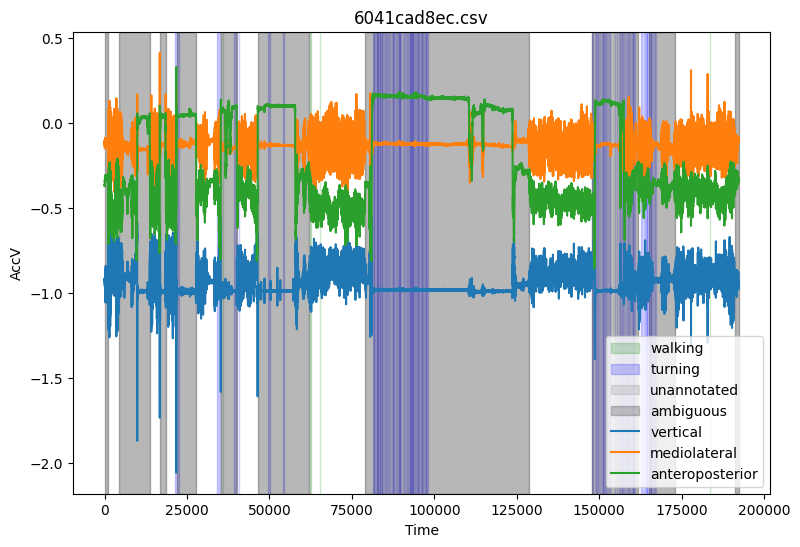

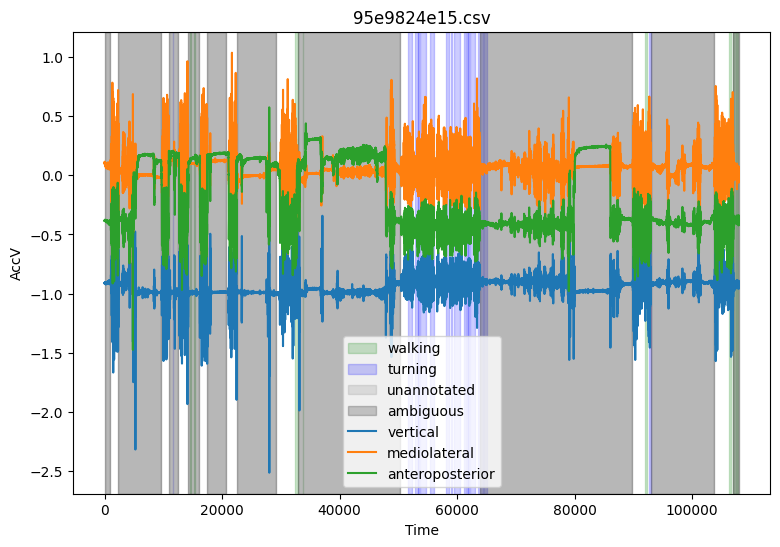

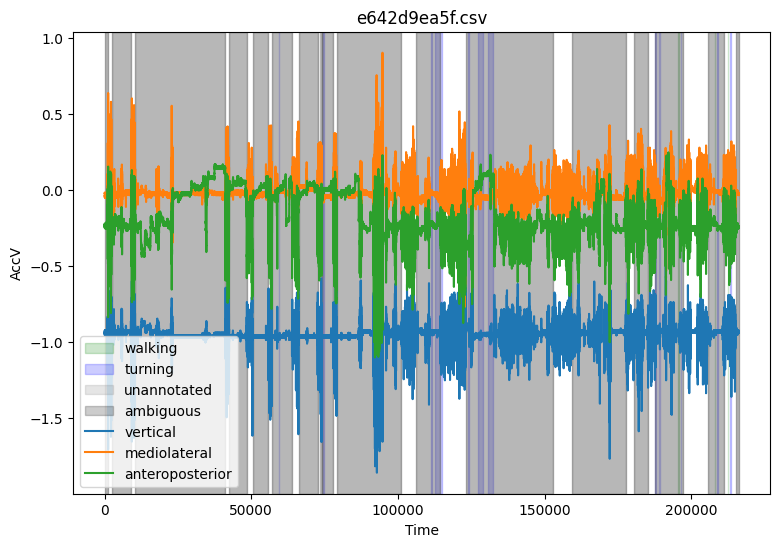

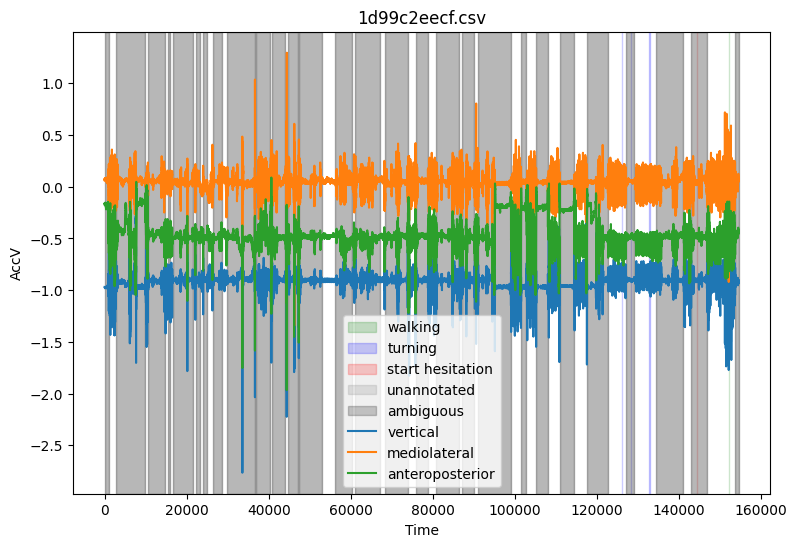

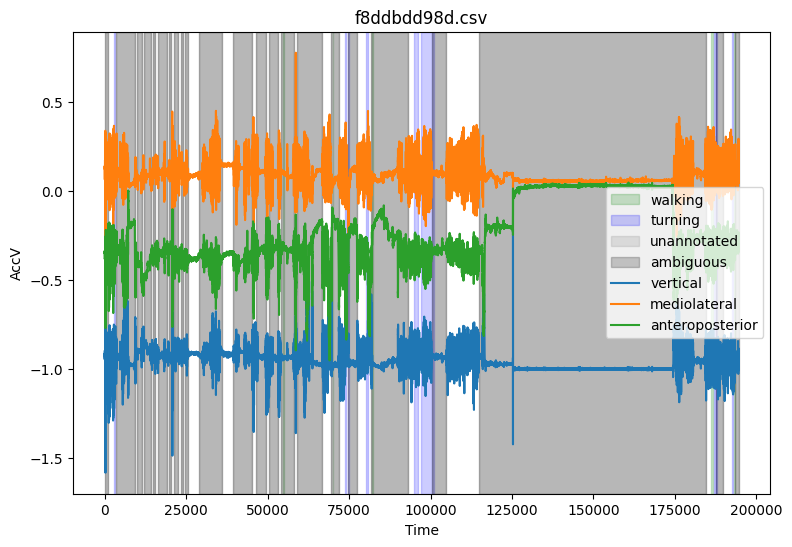

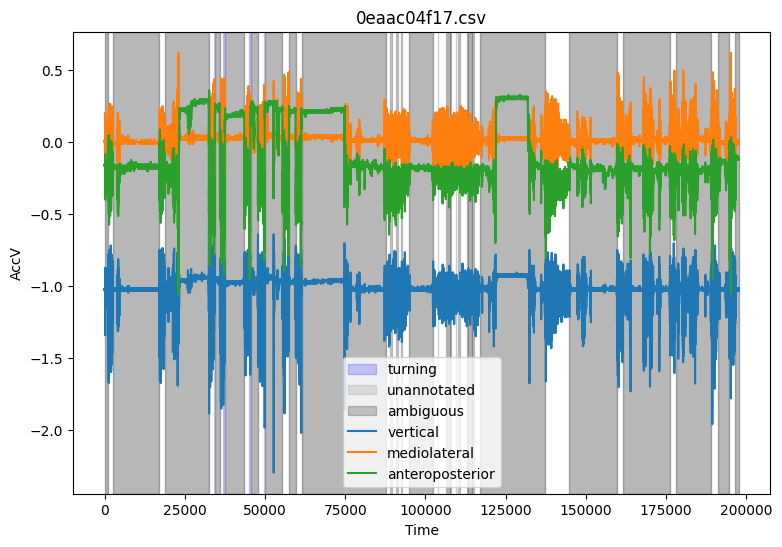

In [11]:
path = config['data_path'] + 'train/' + 'defog/'
files = os.listdir(path)

for name in files[:10]:
    file_path = os.path.join(path, name)
    plot_velocity_data(file_path)

### TDCSFOG

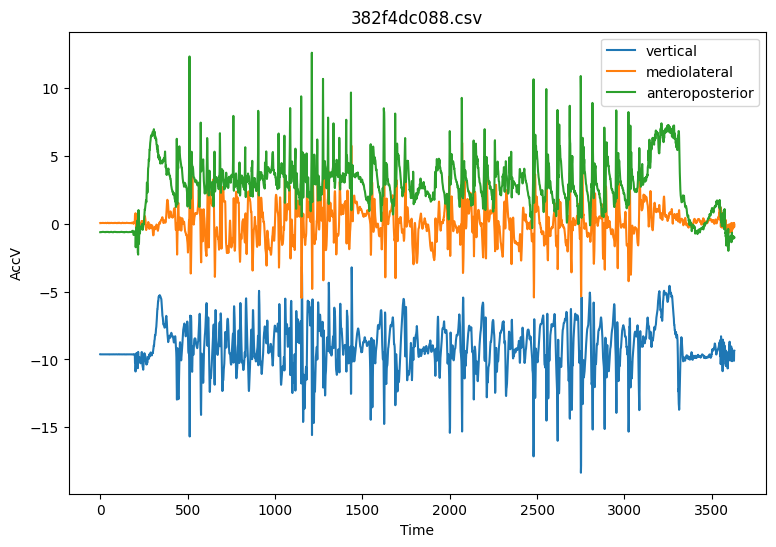

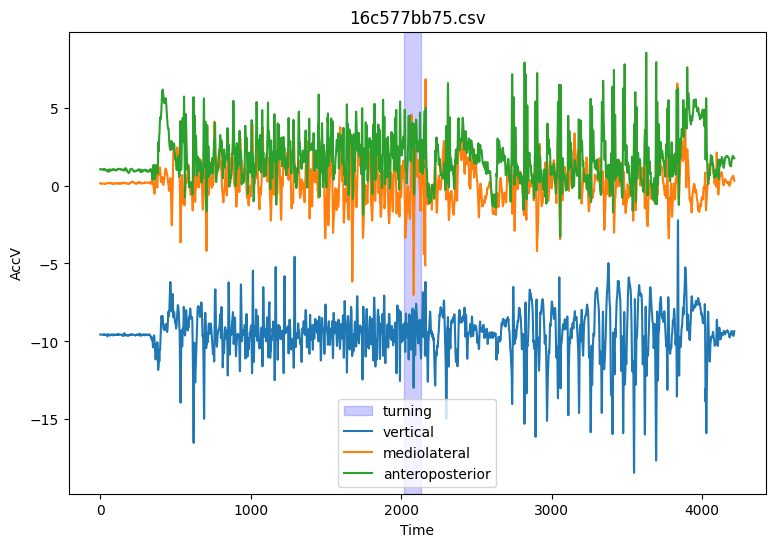

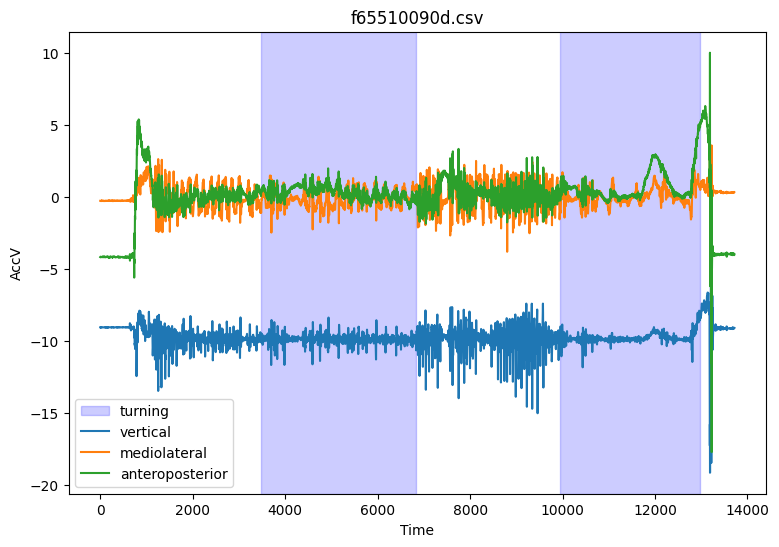

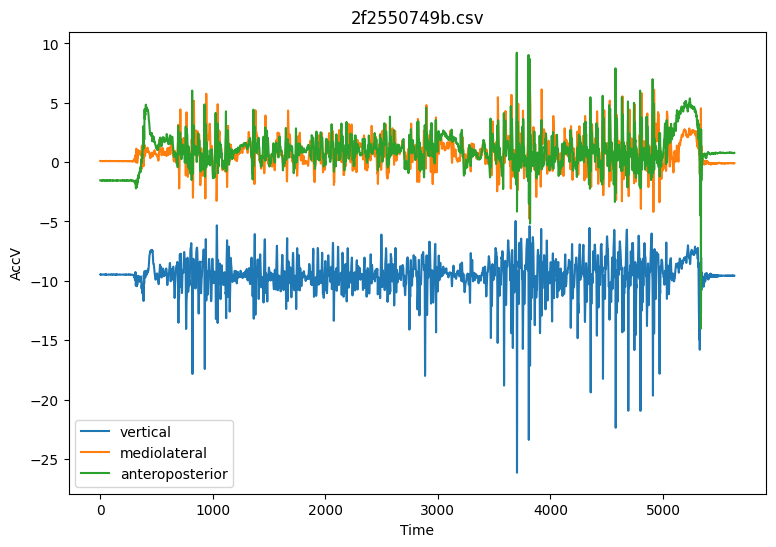

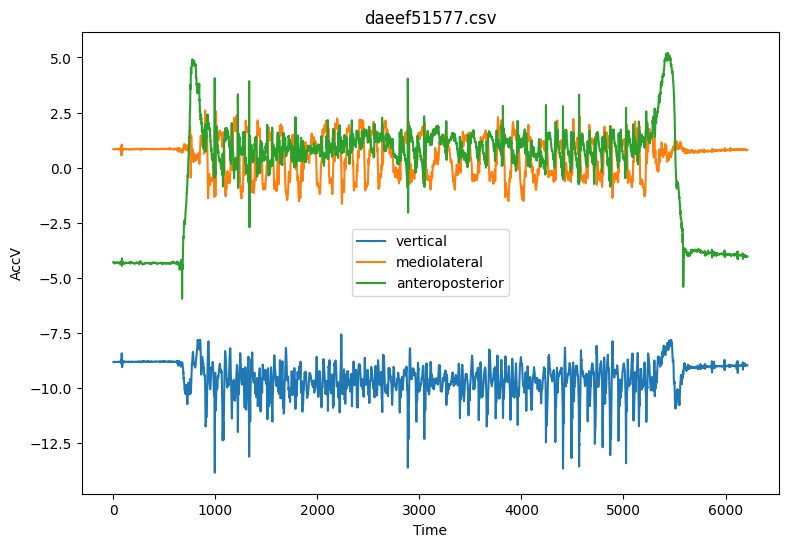

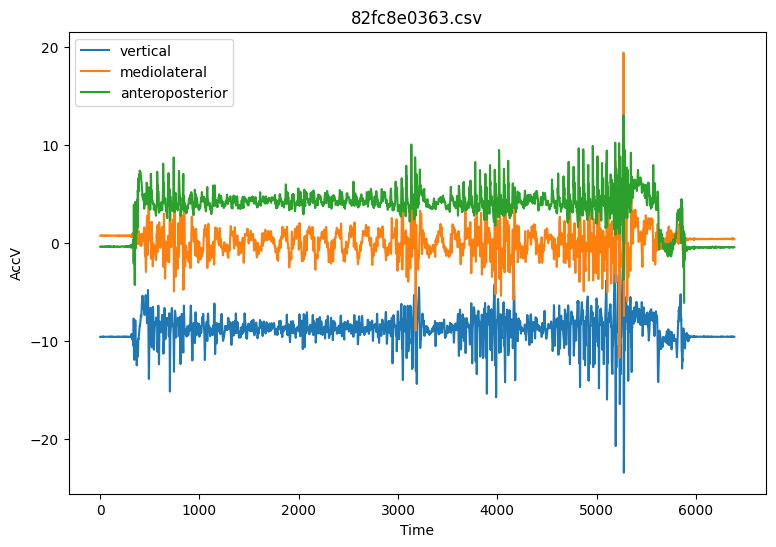

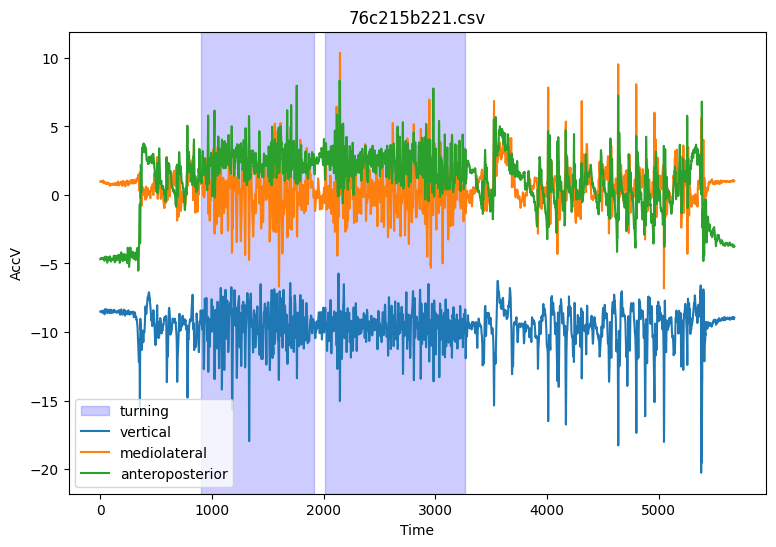

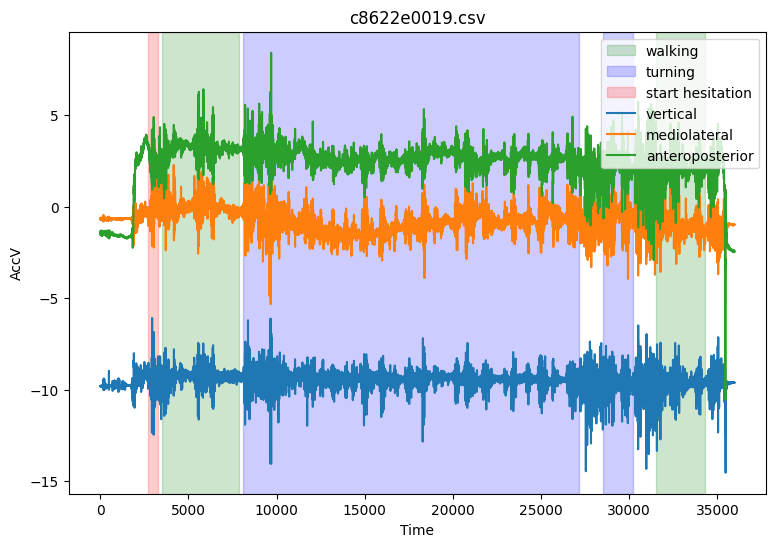

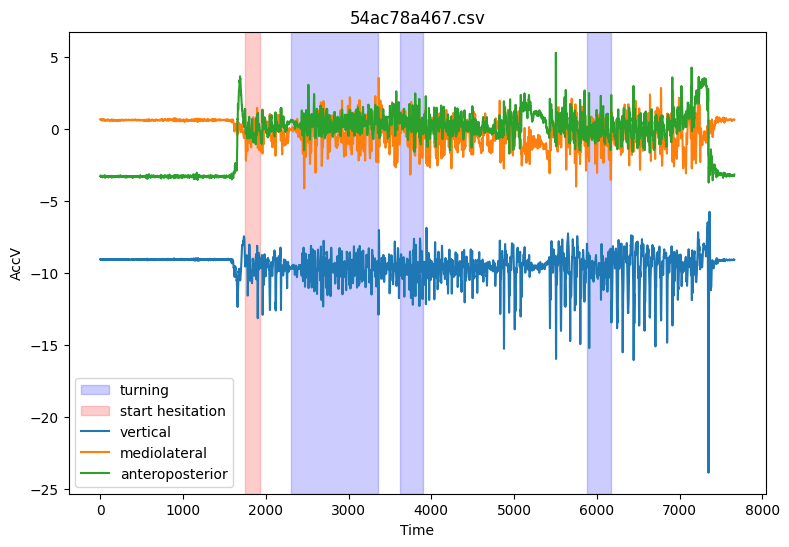

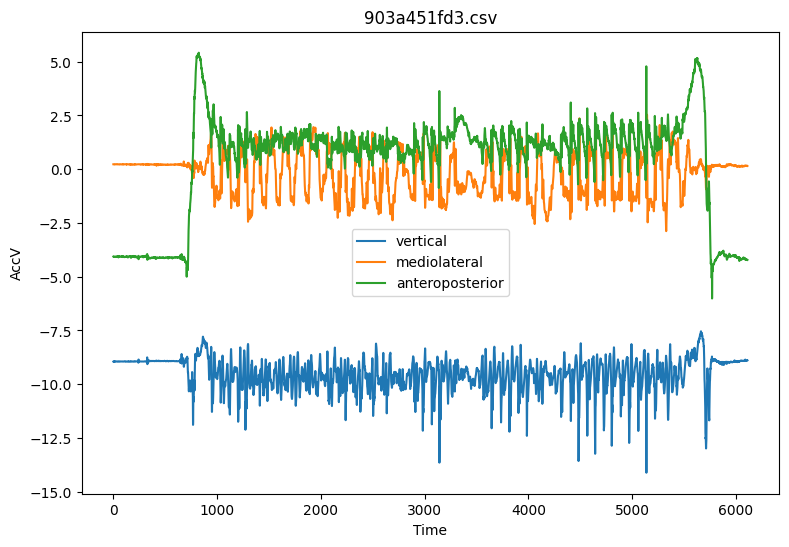

In [10]:
path = config['data_path'] + 'train/' + 'tdcsfog/'
files = os.listdir(path)

for name in files[:10]:
    file_path = os.path.join(path, name)
    plot_velocity_data(file_path)

### Test Data

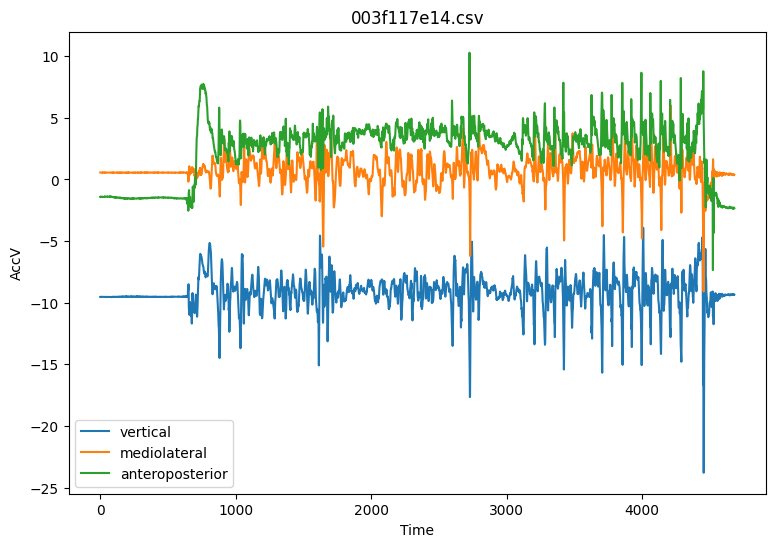

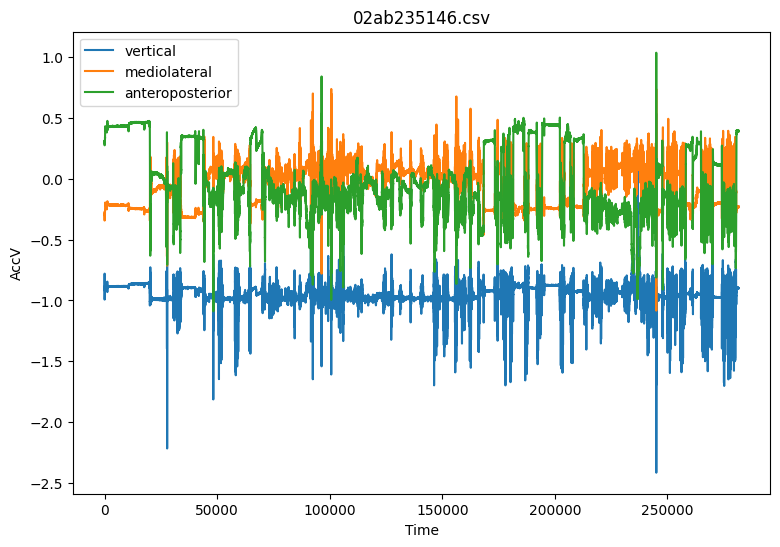

In [9]:
path = config['data_path'] + 'test/' + 'tdcsfog/'
name = os.listdir(path)[0]

file_path = os.path.join(path, name)
plot_velocity_data(file_path)

path = config['data_path'] + 'test/' + 'defog/'
name = os.listdir(path)[0]

file_path = os.path.join(path, name)
plot_velocity_data(file_path)

### notype

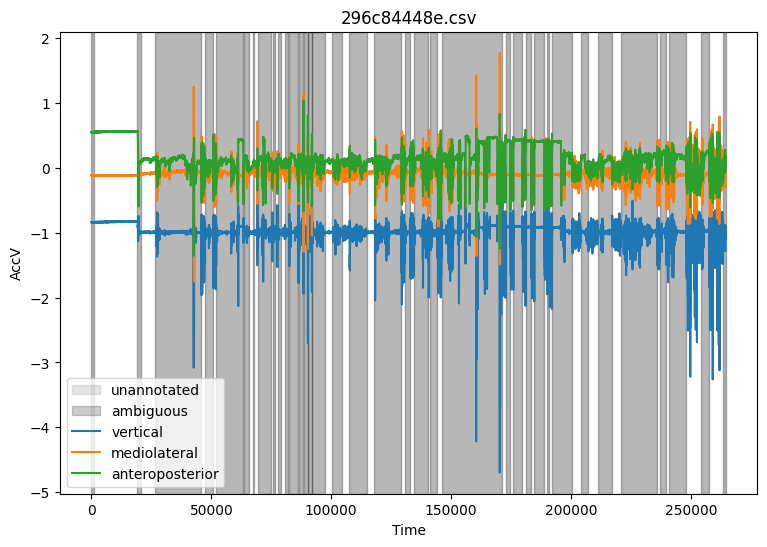

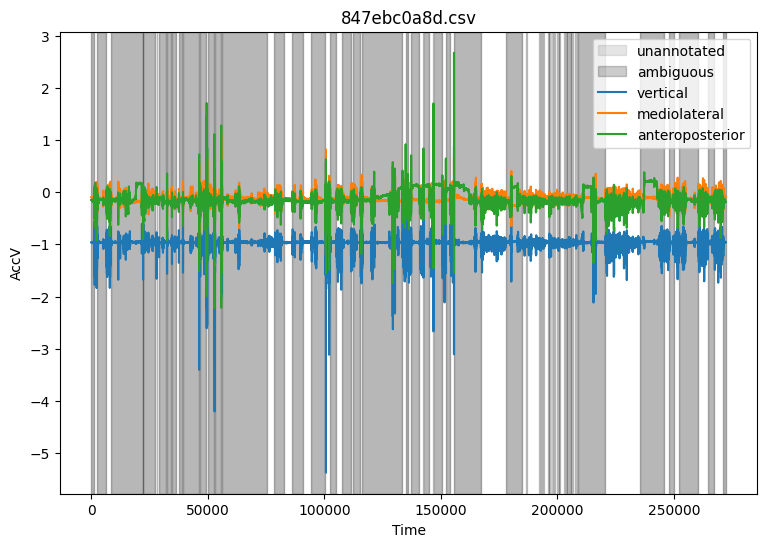

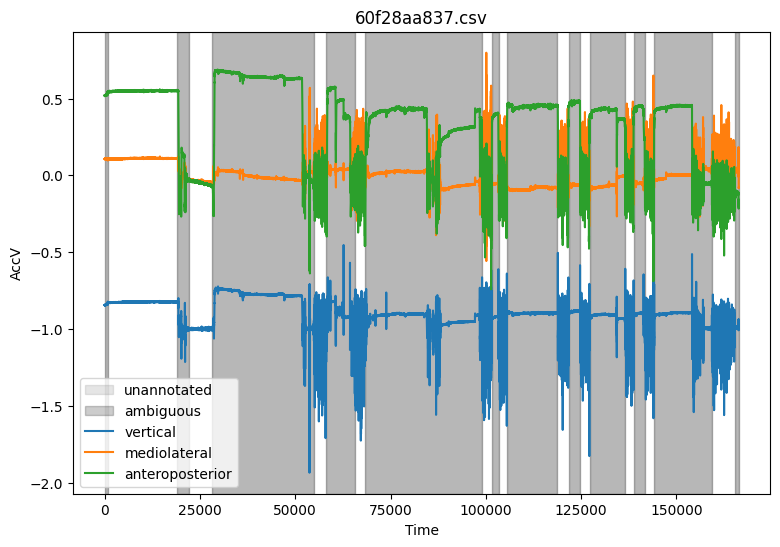

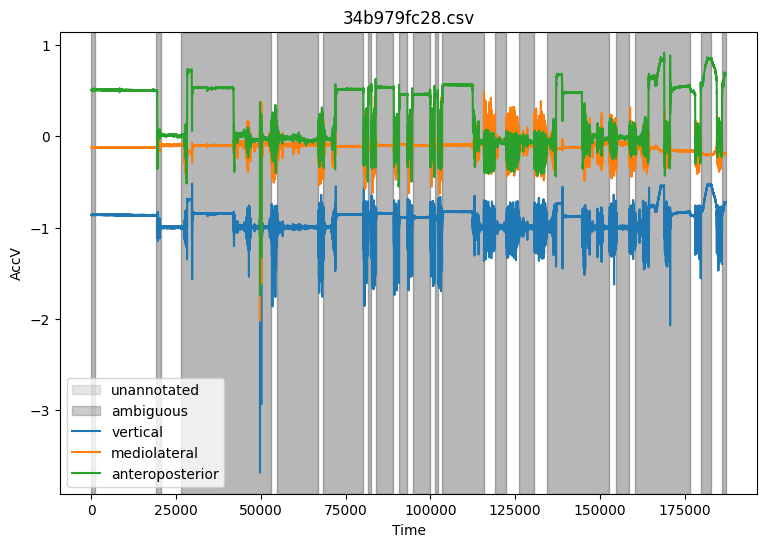

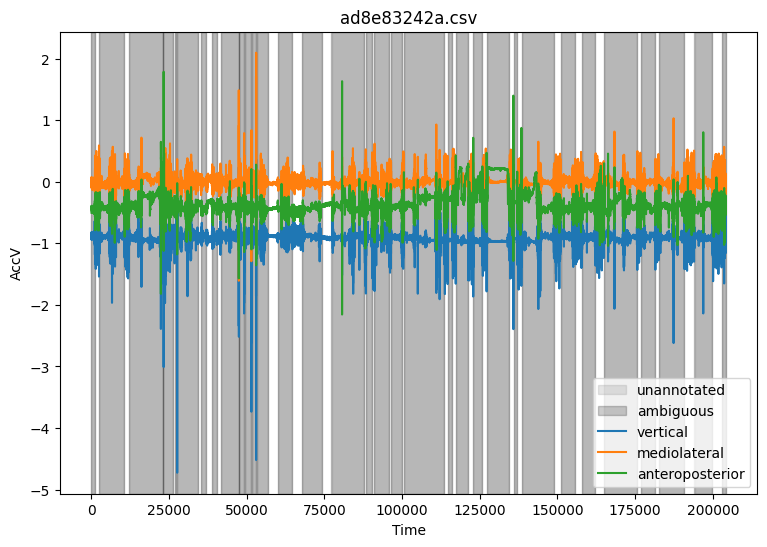

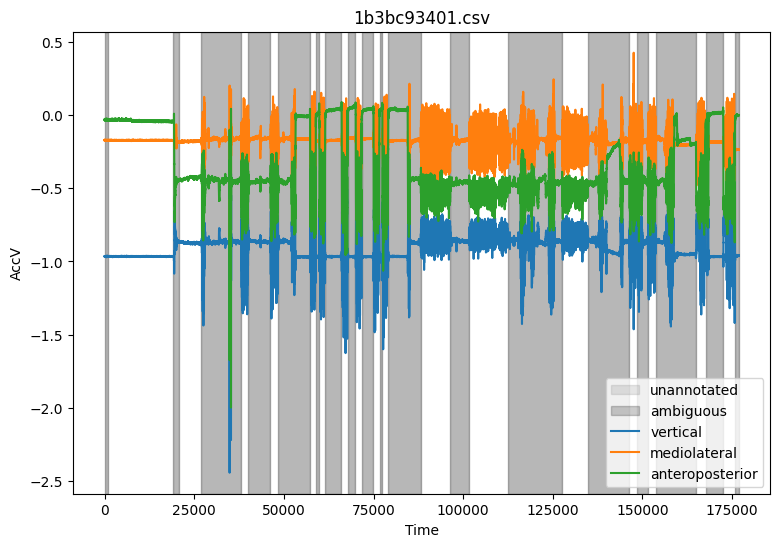

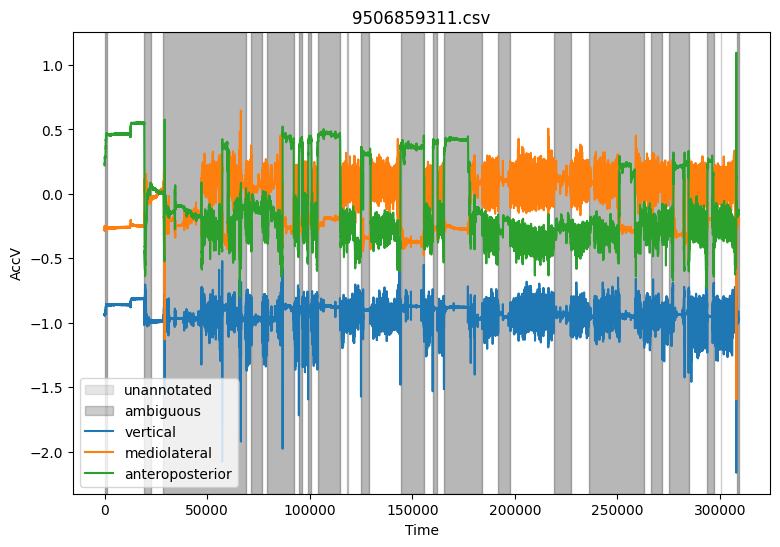

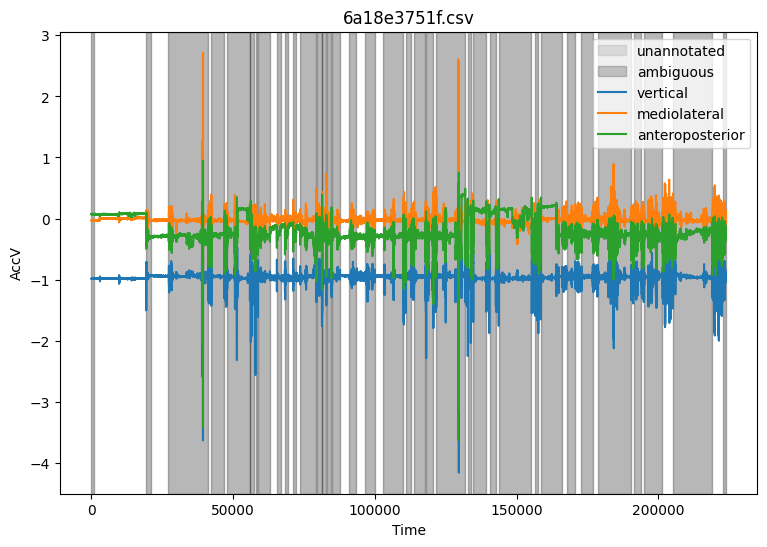

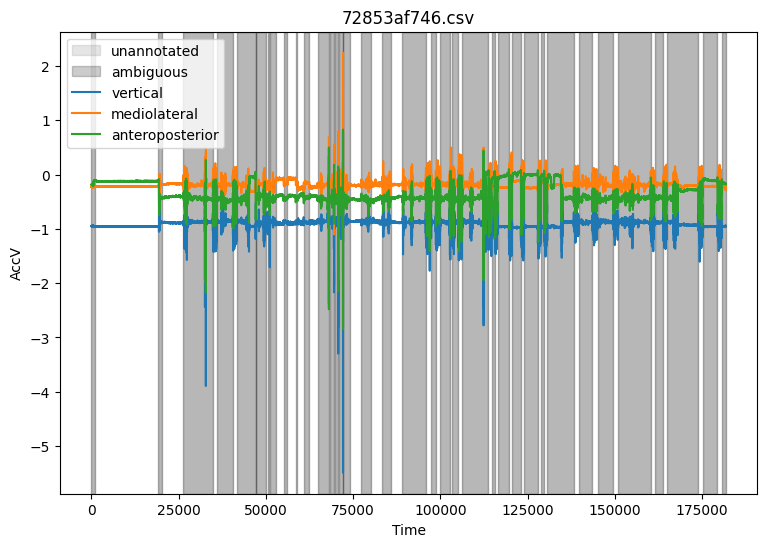

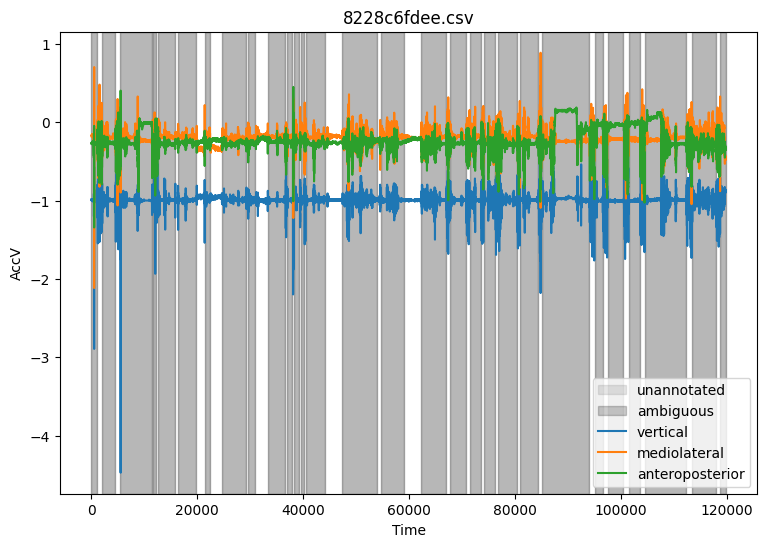

In [12]:
path = config['data_path'] + 'train/' + 'notype/'
files = os.listdir(path)

for name in files[:10]:
    file_path = os.path.join(path, name)
    plot_velocity_data(file_path)

# Aggregate Statistics

In [1]:
from EDA import generate_aggregate_statistics

In [2]:
df_agg = generate_aggregate_statistics()

scanning defog
scanning tdcsfog
scanning notype


In [3]:
df_agg

,file_name,AccV_mean,AccML_mean,AccAP_mean,AccV_std,AccML_std,AccAP_std,count,StartHesitation_percentage,Turn_percentage,Walking_percentage,Valid_percentage,Task_percentage
0,961b782275.csv,-0.939428,-0.018315,-0.156548,0.074484,0.080683,0.135559,253385,0.0,0.009164,0.000000,0.194834,0.194921
0,139f60d29b.csv,-0.910362,0.015316,0.246506,0.138594,0.064034,0.326299,93762,0.0,0.009023,0.000448,0.272797,0.272840
0,f9efef91fb.csv,-0.987690,-0.063905,-0.032725,0.054635,0.061024,0.106699,123972,0.0,0.048172,0.005138,0.289928,0.290017
0,8d2d863dfd.csv,-0.928878,0.034984,0.156366,0.069079,0.068653,0.219796,158932,0.0,0.025501,0.033499,0.460272,0.462777
0,6041cad8ec.csv,-0.928935,-0.128044,-0.207771,0.069431,0.049584,0.269112,192308,0.0,0.138798,0.001929,0.426275,0.426306
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,3f02fa6e40.csv,-0.935630,-0.123579,-0.287595,0.081274,0.086807,0.125472,210568,NaN,NaN,NaN,0.328787,0.328920
0,71dd8ce20d.csv,-0.957560,-0.087820,0.189454,0.089807,0.064406,0.214284,196120,NaN,NaN,NaN,0.342566,0.342632
0,2054f1d5df.csv,-0.908499,-0.088595,-0.096168,0.053811,0.094600,0.339363,244020,NaN,NaN,NaN,0.493103,0.493156
0,434732a5e3.csv,-0.874972,-0.035055,-0.427373,0.059685,0.055935,0.132617,443496,NaN,NaN,NaN,0.387850,0.390337


In [7]:
df_agg.Walking_percentage.mean()
df_agg.Valid_percentage.mean()
df_agg.Task_percentage.mean()

0.007641453902455489

In [12]:
sample_submission['StartHesitation'] = df_agg.StartHesitation_percentage.mean()
sample_submission['Turn'] = df_agg.Turn_percentage.mean()
sample_submission['Walking'] = df_agg.Walking_percentage.mean()

In [15]:
sample_submission

,Id,StartHesitation,Turn,Walking
0,003f117e14_0,0.009295,0.108751,0.007641
1,003f117e14_1,0.009295,0.108751,0.007641
2,003f117e14_2,0.009295,0.108751,0.007641
3,003f117e14_3,0.009295,0.108751,0.007641
4,003f117e14_4,0.009295,0.108751,0.007641
...,...,...,...,...
286365,02ab235146_281683,0.009295,0.108751,0.007641
286366,02ab235146_281684,0.009295,0.108751,0.007641
286367,02ab235146_281685,0.009295,0.108751,0.007641
286368,02ab235146_281686,0.009295,0.108751,0.007641


In [14]:
sample_submission.to_csv('./submissions/percentage_averages.csv', index=False)

# Unlabeled Data

In [1]:
from EDA import plot_velocity_data

In [4]:
path = os.path.join(config['data_path'], 'unlabeled')
name = os.listdir(path)[0]
file_path = os.path.join(path, name)

In [ ]:
plot_velocity_data(file_path)